In [3]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
# Reset PN generator.
seed = 42
np.random.seed(seed)

## Definição de funções.

In [20]:
# Função que cria o modelo gerador (target function).
def target_function(N):
    # Attribute.
    x1 = np.linspace(-2, 1, N).reshape(N, 1)
    # Polinômio de grau 2.
    y = 2 + x1 + 0.5*x1**2 + 2.1*x1**3 + 1.2*x1**4
    y_noisy = y + np.random.randn(N, 1)
    return y, y_noisy, x1

## Conjunto de treinamento com 30 exemplos.

In [21]:
# Example set size.
N = 30

# Create target function.
y, y_noisy, x1 = target_function(N)

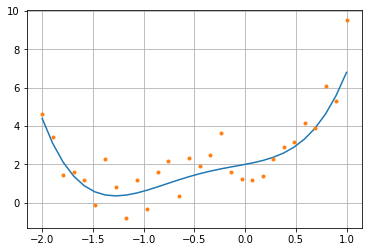

In [22]:
plt.plot(x1, y, label='')
plt.plot(x1, y_noisy, '.', label='')
plt.grid()
plt.show()

In [23]:
# Split arrays or matrices into random train and test subsets.
x1_train, x1_val, y_train, y_val = train_test_split(x1, y_noisy, test_size=0.2, random_state=seed)

print('Training set size: ', len(y_train))
print('Validation set size: ', len(y_val))

Training set size:  24
Validation set size:  6


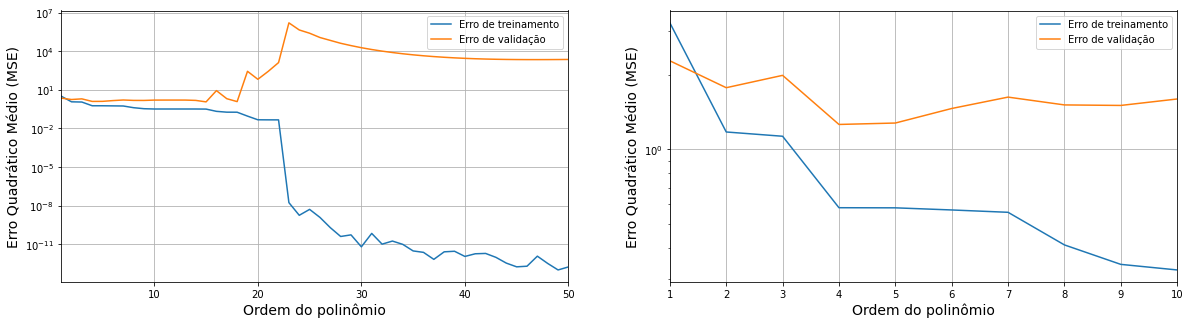

In [24]:
maxDegree = 50
error_train = []
error_val = []
for d in range(1, maxDegree+1):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    # Perform polynomial regression.
    polynomial_regression.fit(x1_train, y_train)

    # Use the trained model for prediction of the training set.
    y_train_predict = polynomial_regression.predict(x1_train)
    
    # Use the trained model for prediction of the validation set.
    y_val_predict = polynomial_regression.predict(x1_val)    

    # Append MSE values to both lists.
    error_train.append(mean_squared_error(y_train, y_train_predict))
    
    error_val.append(mean_squared_error(y_val, y_val_predict))

fig = plt.figure(figsize=(20,5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, maxDegree+1), error_train, label='Erro de treinamento')
plt.plot(range(1, maxDegree+1), error_val, label='Erro de validação')
plt.yscale('log')
plt.xlim([1, maxDegree])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.grid()
plt.legend()

ax = plt.subplot(1, 2, 2)
degreeToPlot = 10
plt.plot(range(1, degreeToPlot+1), error_train[0:degreeToPlot], label='Erro de treinamento')
plt.plot(range(1, degreeToPlot+1), error_val[0:degreeToPlot], label='Erro de validação')
plt.yscale('log')
plt.xlim([1, degreeToPlot])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.grid()
plt.legend()

plt.savefig("erro_de_aproximacao.png", dpi=600)

plt.show()

## Conjunto de treinamento com 100 exemplos.

In [25]:
# Reset PN generator.
np.random.seed(seed)

In [26]:
# Example set size.
N = 100

# Create target function.
y, y_noisy, x1 = target_function(N)

In [27]:
# Split arrays or matrices into random train and test subsets.
x1_train, x1_val, y_train, y_val = train_test_split(x1, y_noisy, test_size=0.2, random_state=seed)

print('Training set size: ', len(y_train))
print('Validation set size: ', len(y_val))

Training set size:  80
Validation set size:  20


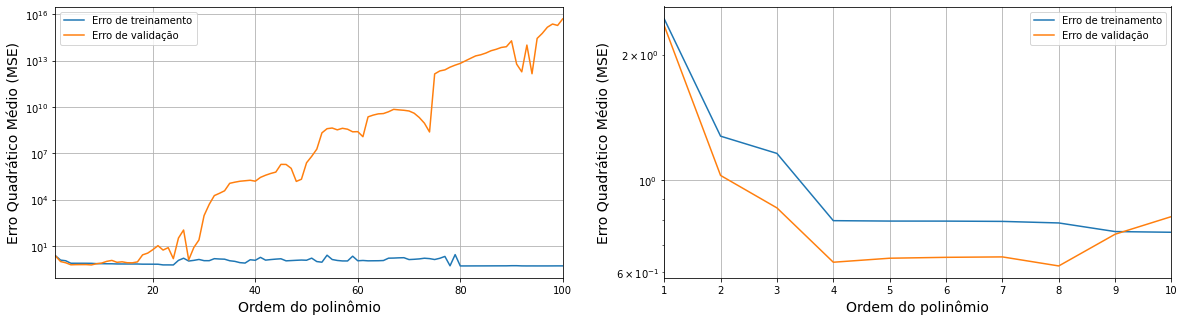

In [28]:
maxDegree = 100
error_train = []
error_val = []
for d in range(1, maxDegree+1):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    # Perform polynomial regression.
    polynomial_regression.fit(x1_train, y_train)

    # Use the trained model for prediction of the training set.
    y_train_predict = polynomial_regression.predict(x1_train)
    
    # Use the trained model for prediction of the validation set.
    y_val_predict = polynomial_regression.predict(x1_val)    

    error_train.append(mean_squared_error(y_train, y_train_predict))
    
    error_val.append(mean_squared_error(y_val, y_val_predict))

fig = plt.figure(figsize=(20,5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, maxDegree+1), error_train, label='Erro de treinamento')
plt.plot(range(1, maxDegree+1), error_val, label='Erro de validação')
plt.yscale('log')
plt.xlim([1, maxDegree])
#plt.ylim([0.1,10])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.grid()
plt.legend()

ax = plt.subplot(1, 2, 2)
degreeToPlot = 10
plt.plot(range(1, degreeToPlot+1), error_train[0:degreeToPlot], label='Erro de treinamento')
plt.plot(range(1, degreeToPlot+1), error_val[0:degreeToPlot], label='Erro de validação')
plt.yscale('log')
plt.xlim([1, degreeToPlot])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.grid()
plt.legend()

plt.savefig("erro_de_aproximacao.png", dpi=600)

plt.show()

## Conjunto de treinamento com 10000 exemplos.

In [29]:
# Reset PN generator.
np.random.seed(seed)

In [30]:
# Example set size.
N = 10000

# Create target function.
y, y_noisy, x1 = target_function(N)

In [31]:
# Split arrays or matrices into random train and test subsets.
x1_train, x1_val, y_train, y_val = train_test_split(x1, y_noisy, test_size=0.2, random_state=seed)

print('Training set size: ', len(y_train))
print('Validation set size: ', len(y_val))

Training set size:  8000
Validation set size:  2000


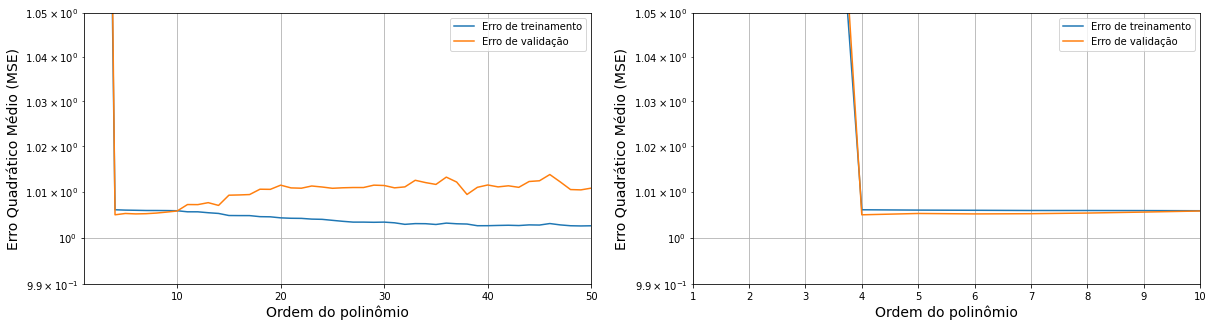

In [32]:
maxDegree = 50
error_train = []
error_val = []
for d in range(1, maxDegree+1):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    # Perform polynomial regression.
    polynomial_regression.fit(x1_train, y_train)

    # Use the trained model for prediction of the training set.
    y_train_predict = polynomial_regression.predict(x1_train)
    
    # Use the trained model for prediction of the validation set.
    y_val_predict = polynomial_regression.predict(x1_val)    

    error_train.append(mean_squared_error(y_train, y_train_predict))
    
    error_val.append(mean_squared_error(y_val, y_val_predict))

fig = plt.figure(figsize=(20,5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, maxDegree+1), error_train, label='Erro de treinamento')
plt.plot(range(1, maxDegree+1), error_val, label='Erro de validação')
plt.yscale('log')
plt.xlim([1, maxDegree])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.ylim([0.99, 1.05])
plt.grid()
plt.legend()

ax = plt.subplot(1, 2, 2)
degreeToPlot = 10
plt.plot(range(1, degreeToPlot+1), error_train[0:degreeToPlot], label='Erro de treinamento')
plt.plot(range(1, degreeToPlot+1), error_val[0:degreeToPlot], label='Erro de validação')
plt.yscale('log')
plt.xlim([1, degreeToPlot])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.ylim([0.99, 1.05])
plt.grid()
plt.legend()

plt.savefig("erro_de_aproximacao.png", dpi=600)

plt.show()